# Predicting the quality of the wine using Random Forest Classifier(RFC) and using cross validation score to improve the accuracy of RFC

## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [3]:
# Loading the dataset
df= pd.read_csv('winequality.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Plotting of data columns distribution in dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

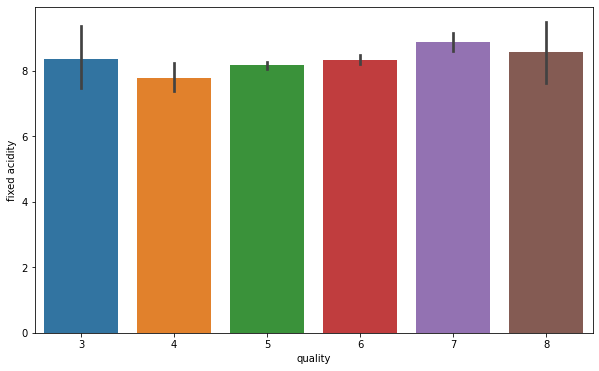

In [11]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y= 'fixed acidity', data= df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

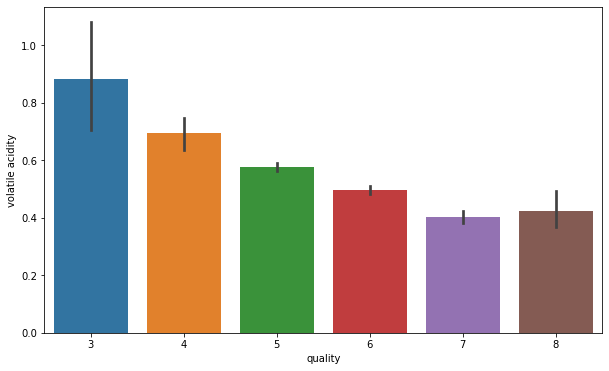

In [12]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

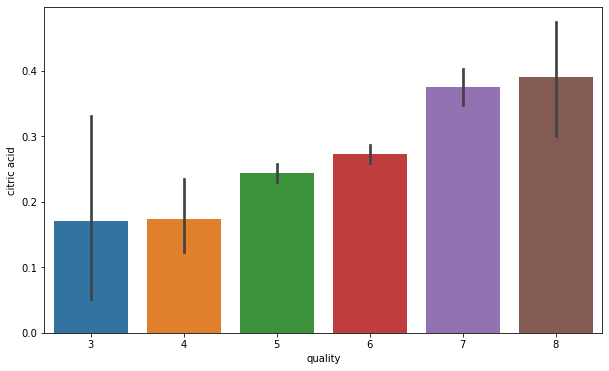

In [13]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

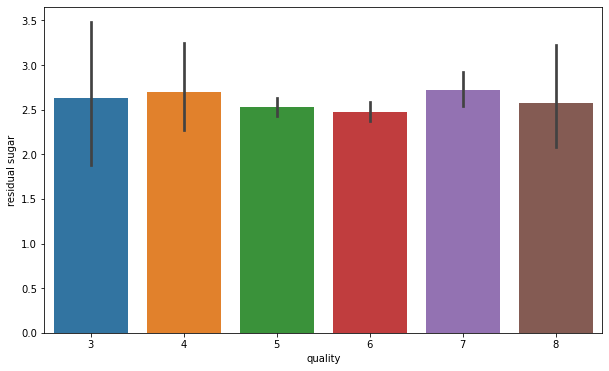

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

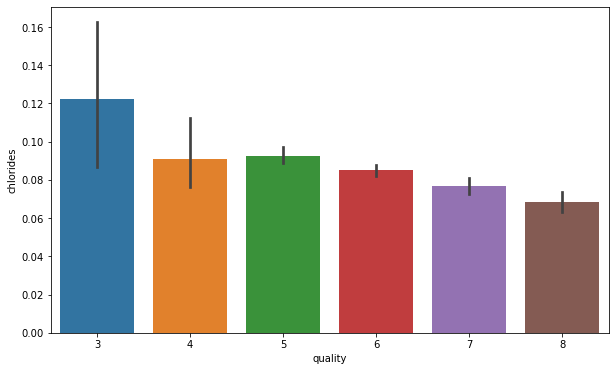

In [15]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

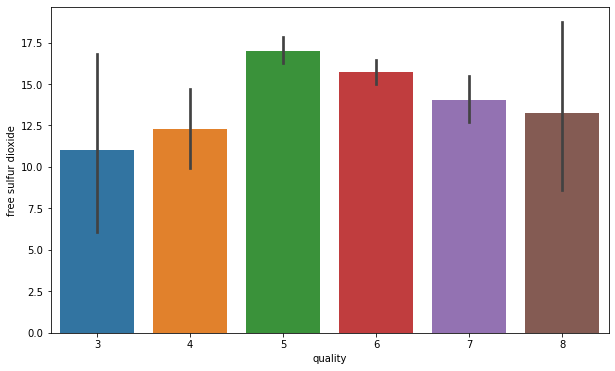

In [17]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y= 'free sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

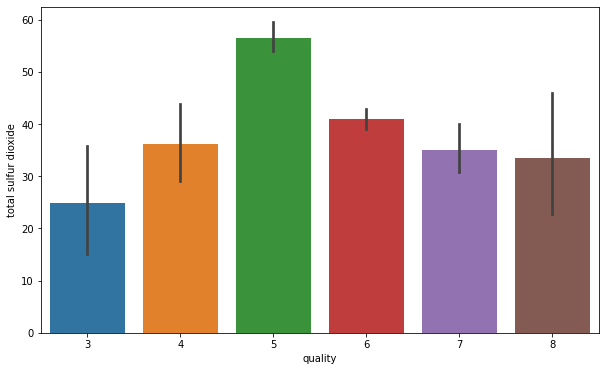

In [18]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

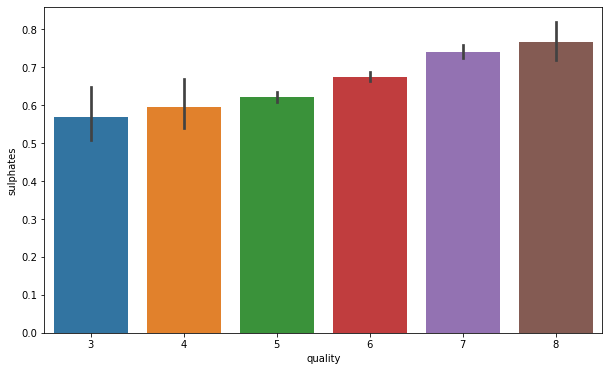

In [19]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

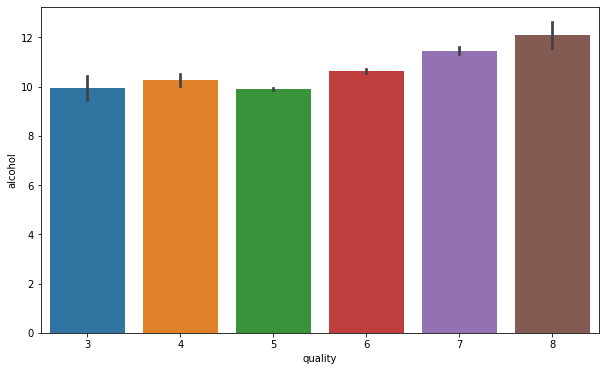

In [20]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=df)

##  Pre-processing data for applying Random Forest Classifier

In [24]:
bins=(2, 6.5, 8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'], bins = bins, labels= group_names)

In [26]:
label_quality = LabelEncoder()

In [27]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [28]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

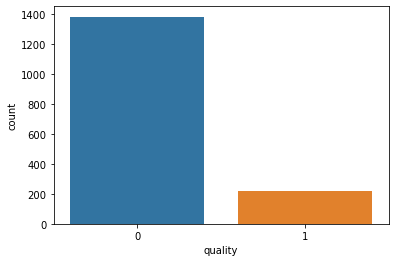

In [31]:
sns.countplot(df['quality'])

In [32]:
x = df.drop('quality', axis=1)
y = df['quality']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

In [34]:
sc = StandardScaler()

In [35]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [38]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



Random Forest Classifier gives an accuracy of 88% !

In [41]:
# Confusion Matrix for Random Forest Classifier
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 29  18]]


## Cross Validation Score

In [42]:
rfc_eval = cross_val_score(estimator = rfc,X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.913238188976378

Random Forest Accuracy increased from 88% to 91% by using Cross Validation Score  